In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('CreditRisk.csv')

In [3]:
df

,City,CC_Payments,Wage,Cost_Living,Mtg,Default,Vacations,Ottawa,Vancouver
0,Toronto,11712,89925,44004,34237,No,13236,0,0
1,Toronto,4114,82327,33111,35928,No,10788,0,0
2,Toronto,15941,68972,12901,37791,No,8326,0,0
3,Toronto,13962,67582,21491,29385,No,7647,0,0
4,Toronto,6150,88983,43084,29614,No,10131,0,0
...,...,...,...,...,...,...,...,...,...
295,Vancouver,-821,83835,40586,45756,Yes,9250,0,1
296,Vancouver,-2637,94408,40667,56616,Yes,6842,0,1
297,Vancouver,-27596,69867,27621,72595,Yes,8249,0,1
298,Vancouver,1875,80345,36048,40150,No,8091,0,1


In [4]:
df['City'].nunique()

3

In [5]:
df.drop(columns = ['City','Ottawa','Vancouver'], inplace =True)

In [6]:
df

,CC_Payments,Wage,Cost_Living,Mtg,Default,Vacations
0,11712,89925,44004,34237,No,13236
1,4114,82327,33111,35928,No,10788
2,15941,68972,12901,37791,No,8326
3,13962,67582,21491,29385,No,7647
4,6150,88983,43084,29614,No,10131
...,...,...,...,...,...,...
295,-821,83835,40586,45756,Yes,9250
296,-2637,94408,40667,56616,Yes,6842
297,-27596,69867,27621,72595,Yes,8249
298,1875,80345,36048,40150,No,8091


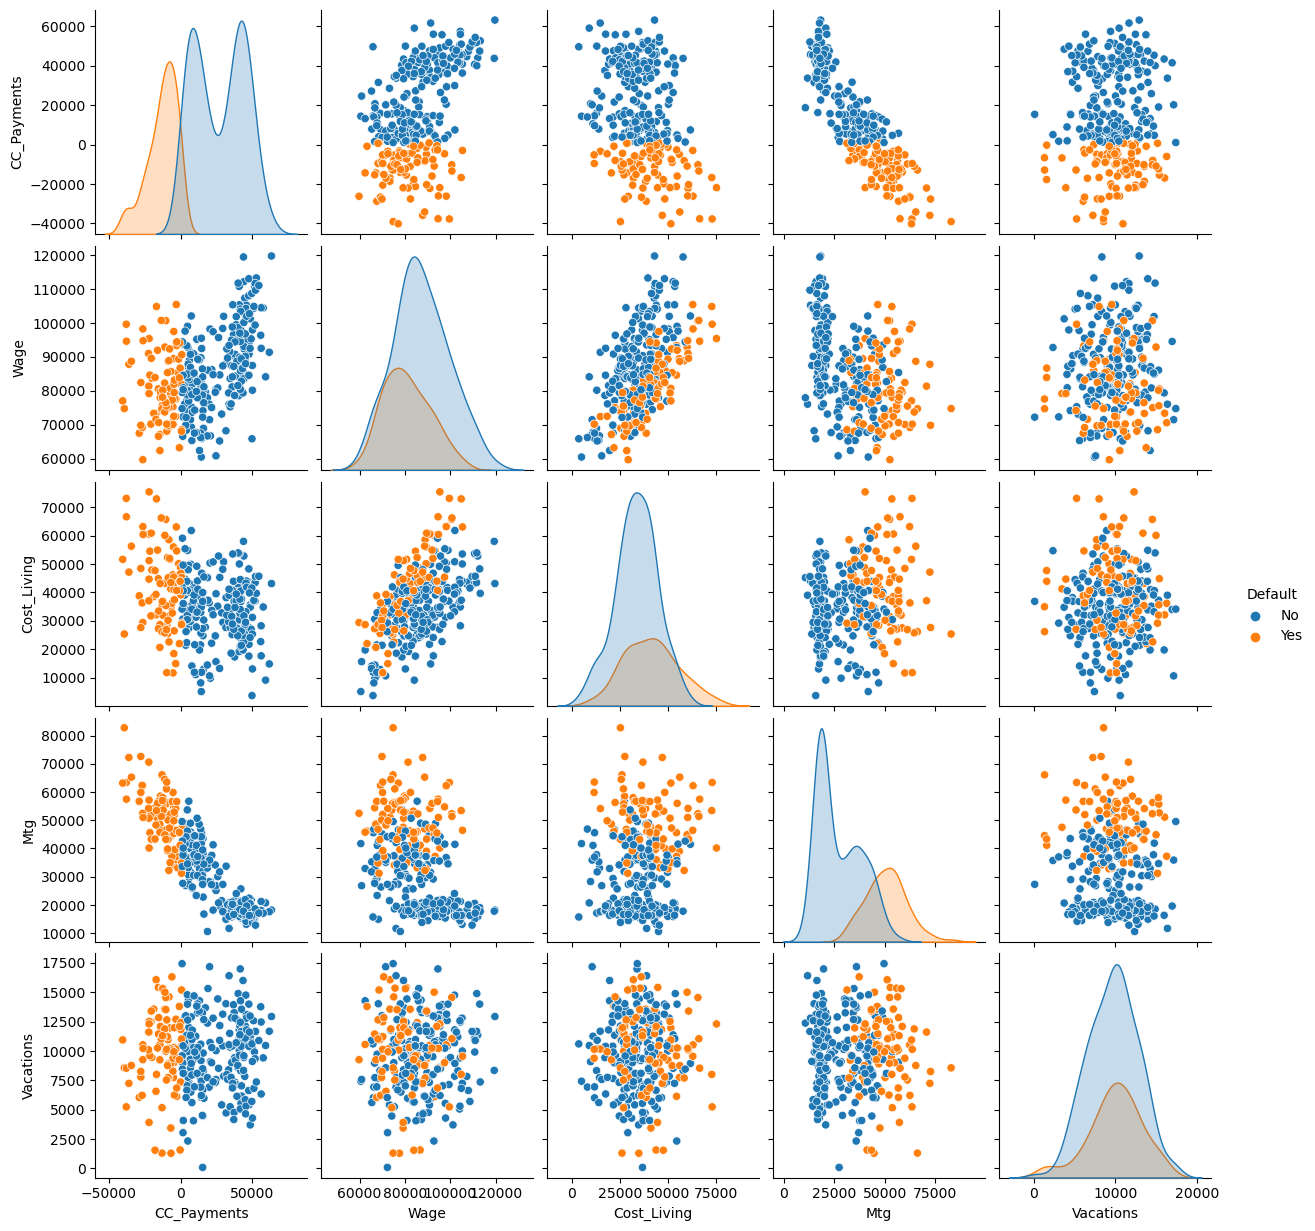

In [7]:
sns.pairplot(df, hue = 'Default')


In [8]:
# df['is_Default'] = (df['Default'] == 'Yes').astype(int)
df['default_enumerated'] = df['Default'].map({'Yes':1,'No': 0})

In [9]:
df

,CC_Payments,Wage,Cost_Living,Mtg,Default,Vacations,default_enumerated
0,11712,89925,44004,34237,No,13236,0
1,4114,82327,33111,35928,No,10788,0
2,15941,68972,12901,37791,No,8326,0
3,13962,67582,21491,29385,No,7647,0
4,6150,88983,43084,29614,No,10131,0
...,...,...,...,...,...,...,...
295,-821,83835,40586,45756,Yes,9250,1
296,-2637,94408,40667,56616,Yes,6842,1
297,-27596,69867,27621,72595,Yes,8249,1
298,1875,80345,36048,40150,No,8091,0


In [10]:
df.describe()

,CC_Payments,Wage,Cost_Living,Mtg,Vacations,default_enumerated
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15085.173333,85327.020000,35959.893333,34264.260000,9789.563333,0.303333
std,24142.424244,12002.180144,12550.754681,15048.593736,3133.039806,0.460466
min,-40164.000000,59734.000000,3654.000000,10583.000000,87.000000,0.000000
25%,-3234.750000,76953.750000,27630.750000,19554.500000,7727.000000,0.000000
50%,11422.500000,84288.000000,35481.500000,34198.000000,10004.000000,0.000000
75%,38863.500000,93335.750000,43542.750000,45641.250000,11960.250000,1.000000
max,63210.000000,119703.000000,75355.000000,82760.000000,17421.000000,1.000000


In [11]:
wage_bins= range(55000,120001,5000)
wage_bins_labels = [60000,65000,70000,75000,80000,85000,90000,95000,100000,105000,110000,115000,120000]

In [12]:
df['wage_bins'] = pd.cut(df['Wage'],bins = wage_bins,labels = wage_bins_labels )

In [13]:
df

,CC_Payments,Wage,Cost_Living,Mtg,Default,Vacations,default_enumerated,wage_bins
0,11712,89925,44004,34237,No,13236,0,90000
1,4114,82327,33111,35928,No,10788,0,85000
2,15941,68972,12901,37791,No,8326,0,70000
3,13962,67582,21491,29385,No,7647,0,70000
4,6150,88983,43084,29614,No,10131,0,90000
...,...,...,...,...,...,...,...,...
295,-821,83835,40586,45756,Yes,9250,1,85000
296,-2637,94408,40667,56616,Yes,6842,1,95000
297,-27596,69867,27621,72595,Yes,8249,1,70000
298,1875,80345,36048,40150,No,8091,0,85000


In [34]:
grouped = df.groupby('wage_bins')['default_enumerated']
stats = grouped.agg(total_no = ('count'),
                    total_defaulter = ('sum'))

In [35]:
stats

,total_no,total_defaulter
wage_bins,,
60000,1,1
65000,5,2
70000,27,10
75000,27,16
80000,45,18
85000,54,13
90000,43,13
95000,34,10
100000,27,4


In [36]:
stats['proportion_of_defaulter'] = stats['total_defaulter']/stats['total_no']

In [37]:
stats

,total_no,total_defaulter,proportion_of_defaulter
wage_bins,,,
60000,1,1,1.000000
65000,5,2,0.400000
70000,27,10,0.370370
75000,27,16,0.592593
80000,45,18,0.400000
85000,54,13,0.240741
90000,43,13,0.302326
95000,34,10,0.294118
100000,27,4,0.148148


<Axes: xlabel='proportion_of_defaulter', ylabel='wage_bins'>

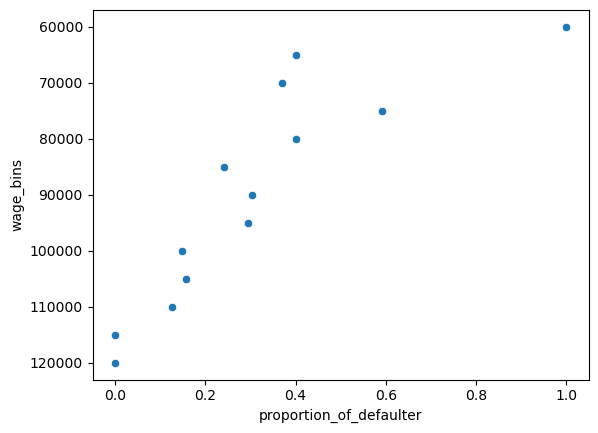

In [40]:
sns.scatterplot(stats, x= 'proportion_of_defaulter',y=stats.index)

In [44]:
X = df.drop(['default_enumerated','Default'], axis = 1)
y = df['default_enumerated']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [46]:
print('X Train Shape',X_train.shape)
print('y Train Shape',y_train.shape)
print('X test Shape',X_test.shape)
print('y test Shape',y_test.shape)


X Train Shape (210, 6)
y Train Shape (210,)
X test Shape (90, 6)
y test Shape (90,)


In [48]:
linear = LogisticRegression(random_state = 42)

In [49]:
linear.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [50]:
pred = linear.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix

print('Accuracy:',accuracy_score(y_test,pred))
print('f1 score:',f1_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))

Accuracy: 0.9888888888888889
f1 score: 0.983050847457627
Precision: 0.9666666666666667


In [65]:
confusion_matrix(y_test,pred)

array([[60,  1],
       [ 0, 29]], dtype=int64)

In [59]:
comparision = pd.DataFrame()

In [66]:
comparision['true_value'] = y_test
comparision['predicted_value'] = pred

In [67]:
comparision

,true_value,predicted_value
203,1,1
266,0,0
152,0,0
9,0,0
233,1,1
...,...,...
114,0,0
118,0,0
72,0,0
15,1,1
